In [4]:
# 📦 Essential libraries for EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings

# 🛠️ Configuration
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pio.kaleido.scope.default_format = "png"

# 📂 Load the Titanic dataset
df = pd.read_csv("../data/Titanic-Dataset.csv")

# 👀 Preview
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Structural info
df.info()

# Basic stats
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


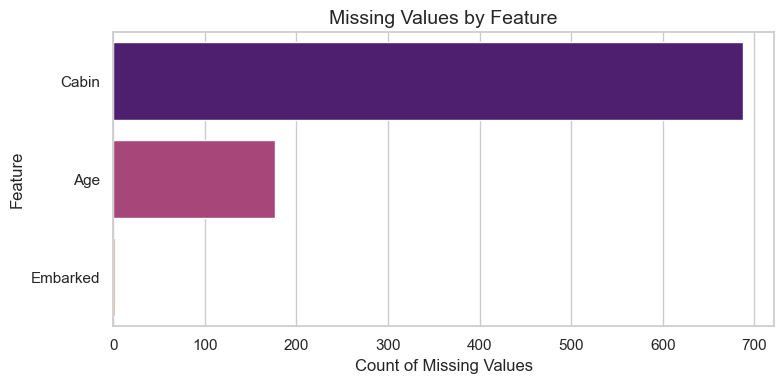

In [7]:
# Create DataFrame for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0].reset_index()
missing.columns = ['Feature', 'MissingValues']

# Barplot (no future warning)
plt.figure(figsize=(8, 4))
sns.barplot(
    data=missing,
    x='MissingValues',
    y='Feature',
    hue='Feature',              # avoids warning by using hue properly
    palette='magma',
    dodge=False,
    legend=False                # disables duplicate legend
)
plt.title("Missing Values by Feature", fontsize=14)
plt.xlabel("Count of Missing Values", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.savefig("../visuals/missing_values_plot.png")
plt.show()




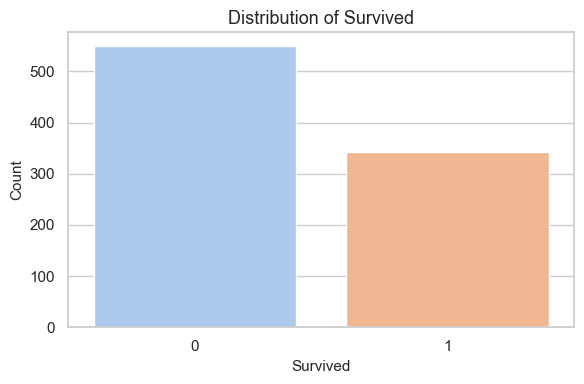

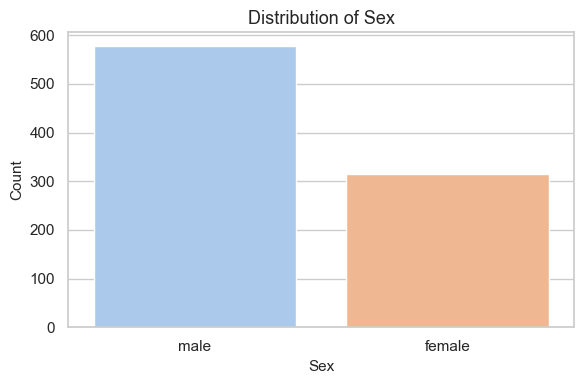

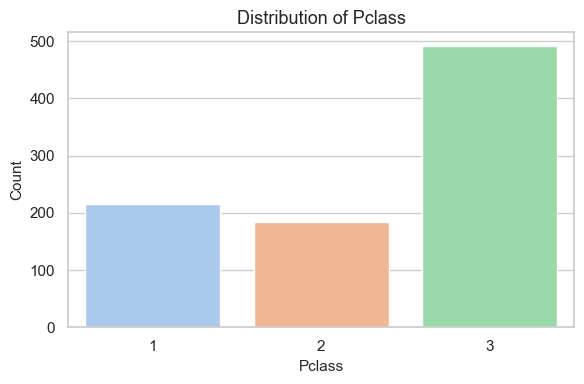

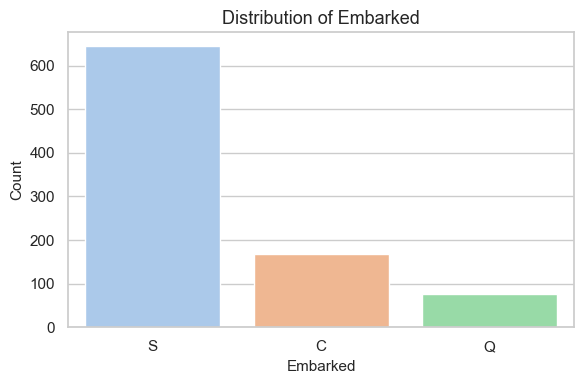

In [9]:
# Categorical features
categorical = ['Survived', 'Sex', 'Pclass', 'Embarked']

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.tight_layout()
    plt.savefig(f"../visuals/{col}_distribution.png")
    plt.show()


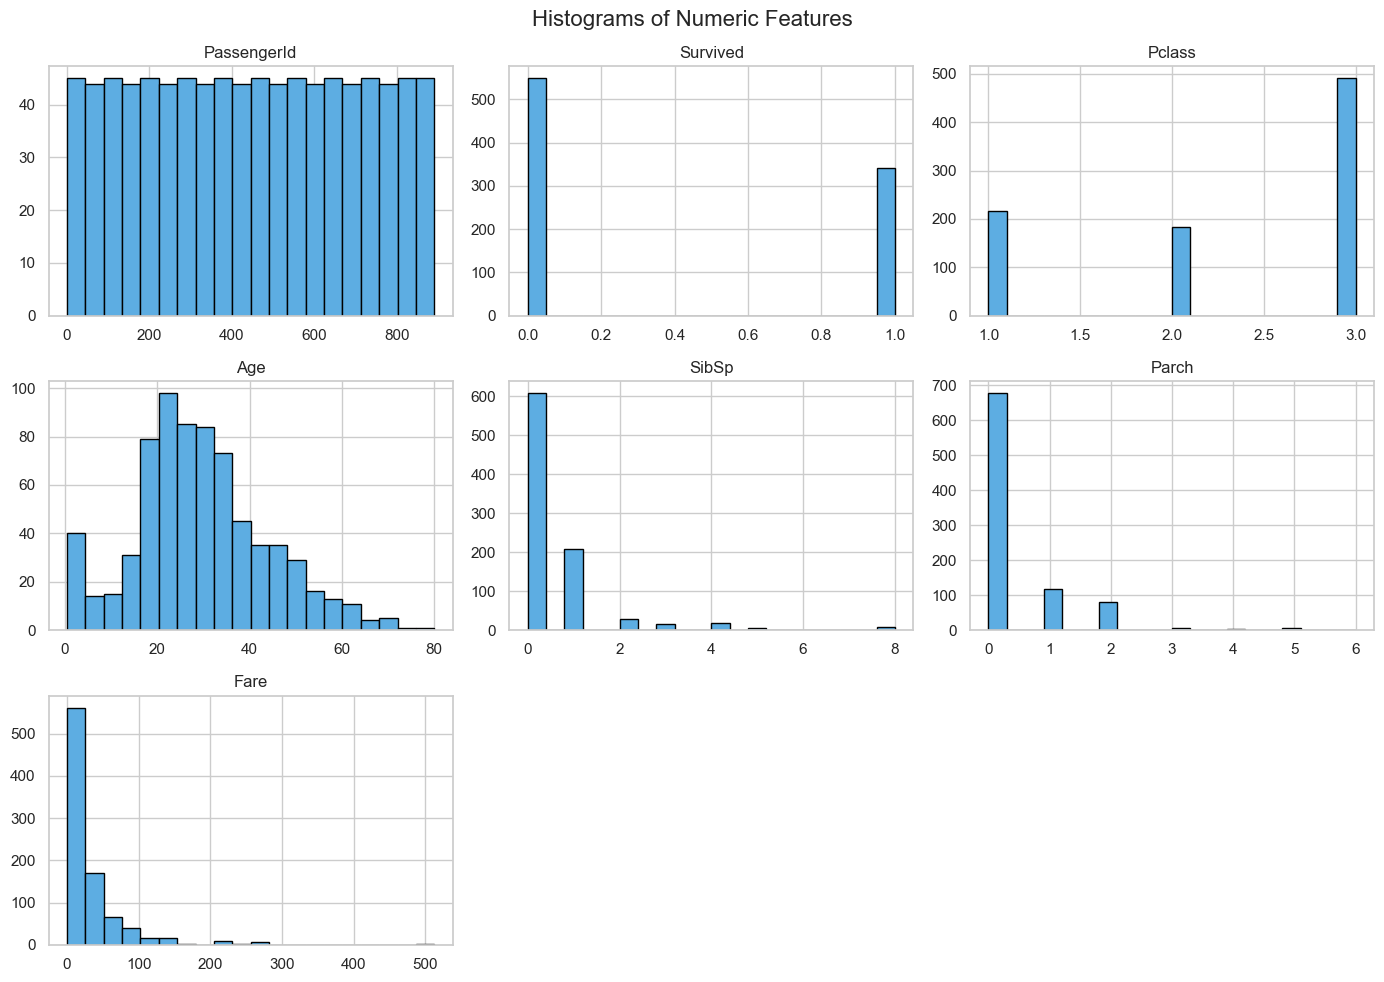

In [10]:
# Numeric features only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(bins=20, figsize=(14, 10), edgecolor='black', color='#5DADE2')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.savefig("../visuals/numeric_histograms.png")
plt.show()


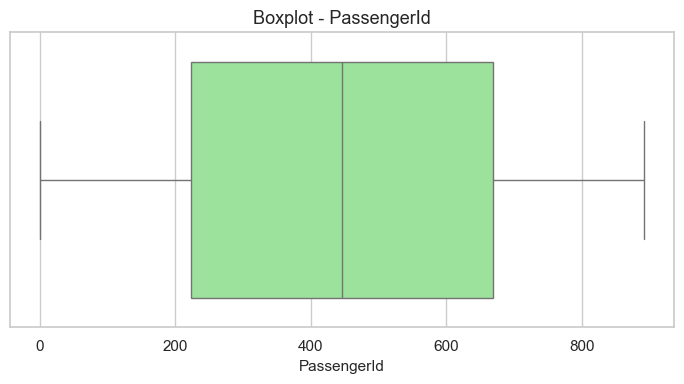

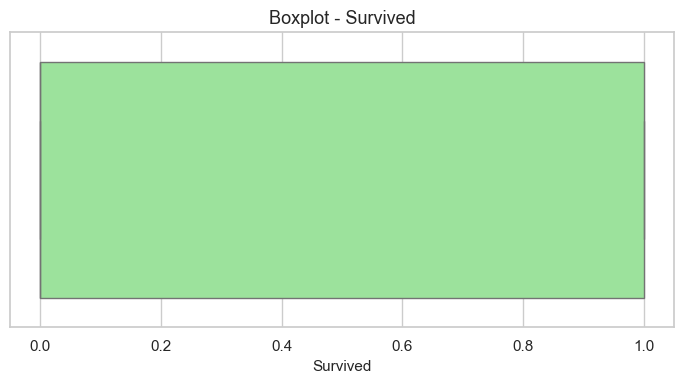

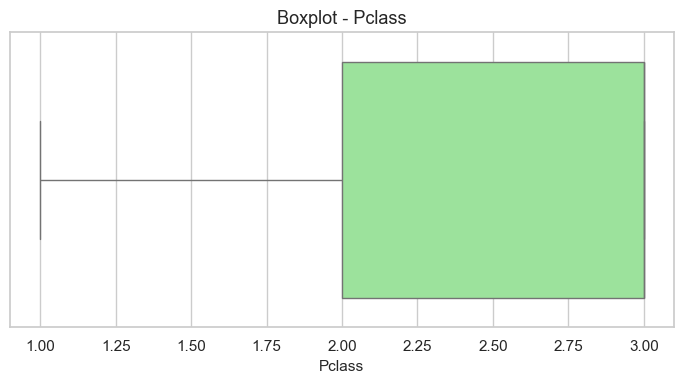

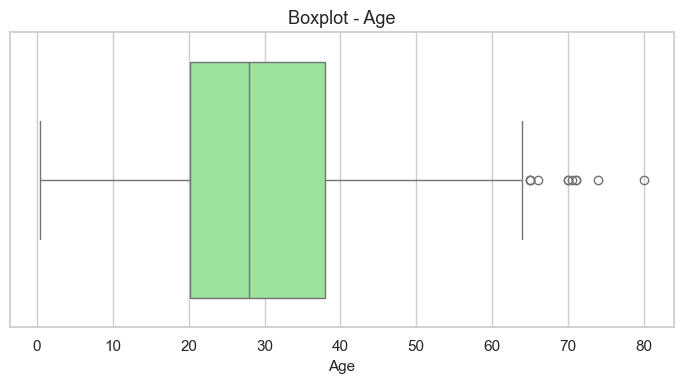

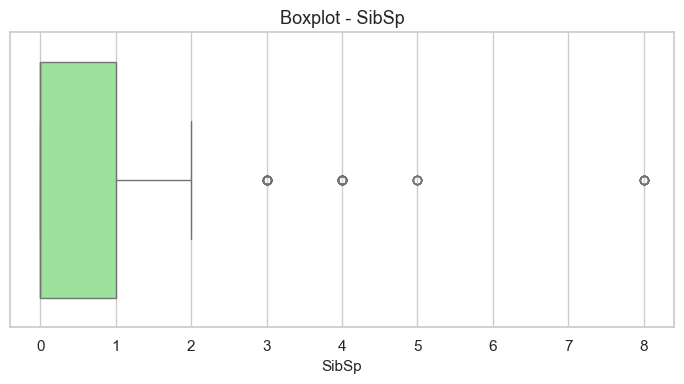

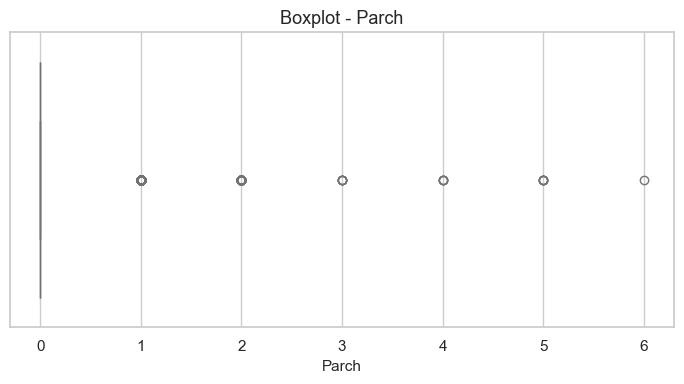

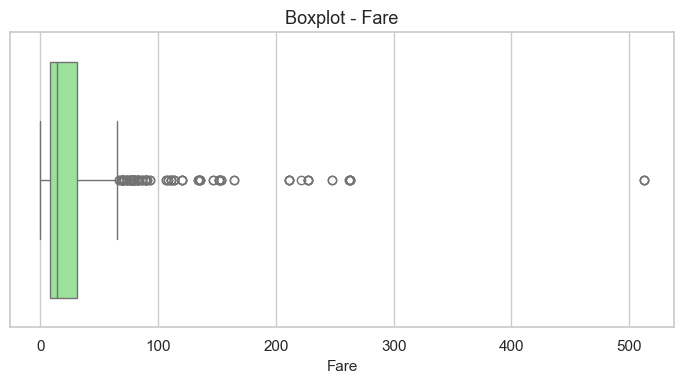

In [11]:
# Boxplot for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot - {col}", fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.tight_layout()
    plt.savefig(f"../visuals/boxplot_{col}.png")
    plt.show()


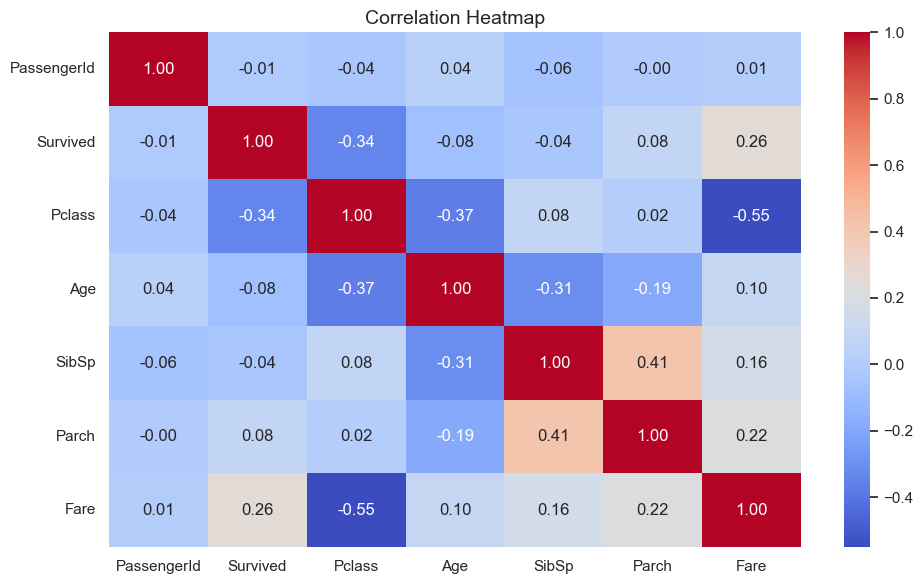

In [12]:
# Correlation matrix
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.savefig("../visuals/correlation_heatmap.png")
plt.show()


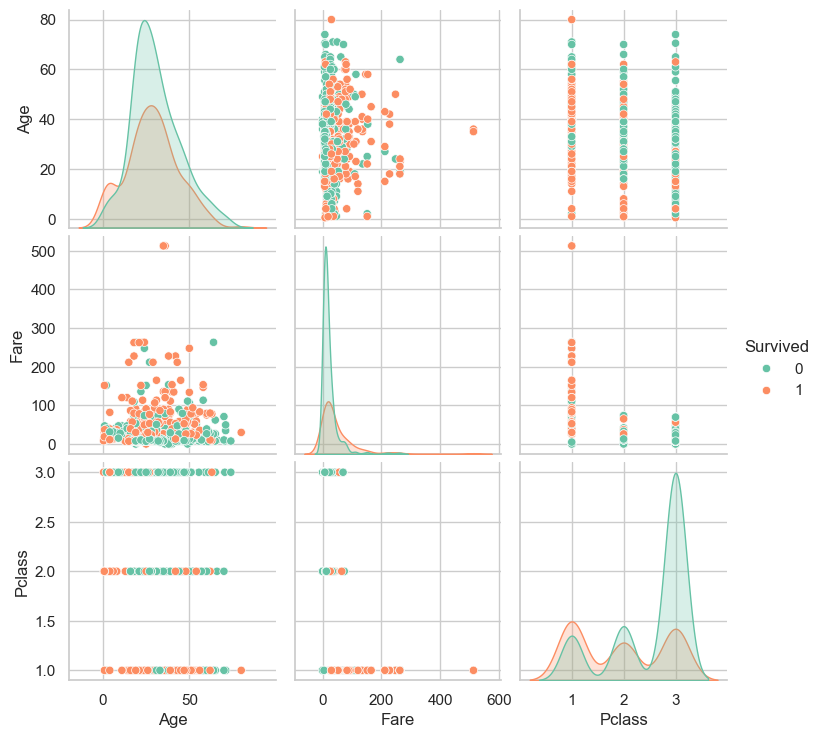

In [13]:
# Select key columns for pairplot
selected_cols = ['Age', 'Fare', 'Pclass', 'Survived']

sns.pairplot(df[selected_cols], hue='Survived', palette='Set2', diag_kind='kde')
plt.savefig("../visuals/pairplot_survived.png")
plt.show()


In [14]:
# Check skewness for numeric features
print("Skewness of Numeric Features:\n")
for col in numeric_cols:
    skew_val = df[col].skew()
    print(f"{col}: Skewness = {skew_val:.2f}")


Skewness of Numeric Features:

PassengerId: Skewness = 0.00
Survived: Skewness = 0.48
Pclass: Skewness = -0.63
Age: Skewness = 0.39
SibSp: Skewness = 3.70
Parch: Skewness = 2.75
Fare: Skewness = 4.79


In [5]:
import plotly.express as px
import plotly.io as pio

pio.kaleido.scope.default_format = "png"

# Plotly interactive scatter plot
fig = px.scatter(
    df,
    x='Age',
    y='Fare',
    color='Survived',
    symbol='Pclass',
    size='Fare',
    hover_data=['Sex', 'Embarked'],
    labels={
        'Age': 'Passenger Age',
        'Fare': 'Fare Paid',
        'Survived': 'Survival (0 = No, 1 = Yes)',
        'Pclass': 'Passenger Class'
    },
    color_discrete_map={0: 'red', 1: 'green'},
    title="🧭 Interactive EDA: Age vs Fare by Survival, Class & Gender",
    template='plotly_dark'
)

# Save the figure
fig.write_image("../visuals/interactive_scatter_plot.png")

# Show the figure
fig.show()


In [6]:
# 🧠 Summary insights from EDA
print("Feature-Level Insights:\n")

# Class distribution
print(f"🔹 Total passengers: {len(df)}")
print(f"🔹 Survived: {df['Survived'].sum()} ({df['Survived'].mean() * 100:.2f}%)")

# Gender-based survival
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("\n🔹 Survival Rate by Gender:")
print(survival_by_gender)

# Class-based survival
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\n🔹 Survival Rate by Class:")
print(survival_by_class)

# Age survival comparison
print("\n🔹 Age Statistics:")
print(df.groupby('Survived')['Age'].describe())

# Pearson correlation matrix (numerical only)
corr = df.select_dtypes(include='number').corr()
print("\n🔹 Correlation with Survival:")
print(corr['Survived'].sort_values(ascending=False))


Feature-Level Insights:

🔹 Total passengers: 891
🔹 Survived: 342 (38.38%)

🔹 Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

🔹 Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

🔹 Age Statistics:
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0

🔹 Correlation with Survival:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64
